In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, f1_score, roc_curve, roc_auc_score, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC 

In [2]:
import warnings
warnings.filterwarnings("ignore")

# EDA

In [3]:
Data = pd.read_csv('Skyserver_SQL2_27_2018 6_51_39 PM.csv')

In [4]:
Data

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [5]:
Data['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

## Описание

Набор данных содержит **10000 наблюдений** космоса и описывается 17-ю характеристиками и одним целевым признаком, который определяет принадлежность к одному из классов: *звезда, галактика или квазар.* Конечный датасет получен путем "склеивания" таблиц "PhotoObj" (содержат фотометрические данные) и "SpecObj" (спектральные данные).

**objid** - идентификатор объекта.  
**ra** - это угловое расстояние, измеренное на восток вдоль небесного экватора от Солнца в момент мартовского равноденствия до часового круга рассматриваемой точки над Землей.  
**dec** - склонение, нужно для определения направления точки на небесной сфере в экваториальной системе координат.  
**u, g, r, i, z** - представляют собой отклик 5 полос телескопа.  
**run** - число, которое идентифицирует конкретное сканирование.  
**rerun** - дополнительное число, указывает как было обработано изображение.  
**camcol** - число от 1 до 6, идентифицирующее строку сканирования в пределах прогона.  
**field** - это часть всего изображения размером 2048 на 1489 пикселей.  
**specobjid** - идентификатор объекта.  
**class** - целевой переменная (объект галактики, звезды или квазара).  
**redshift** - конечное красное смещение. В физике красное смещение происходит, когда свет или другое электромагнитное излучение от объекта увеличивается в длине волны или смещается к красному концу спектра.  
**plate** - номер пластины. В каждой спектроскопической экспозиции используется большая, тонкая, круглая металлическая пластина, на которой размещаются оптические волокна через отверстия, просверленные в местах расположения изображений в фокальной плоскости телескопа. Затем эти волокна поступают в спектрографы. Каждая пластина имеет уникальный серийный номер.  
**mjd** - используется для указания даты, когда был получен данный фрагмент данных SDSS (изображение или спектр).  
**fiberid** - в спектрографе SDSS используются оптические волокна для направления света в фокальной плоскости от отдельных объектов к щелевой головке. Каждому объекту присваивается соответствующий идентификатор волокна. 

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


Пропуски отсутствуют, переменные имеют верный тип данных.

In [7]:
Data.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,0.000000e+00,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


Признаки *objid, rerun* не имеют различных значений, более того, они являются идентификаторами доступа к данным, а значит эти переменные не нужны для классификации. Также, в датасете имеются выбросы. Например, **i** имеет сильную разницу между 75% квантилем и максимальным значением.

In [8]:
Data.drop(columns=['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid', 'fiberid','plate'], inplace=True) 

array([[<AxesSubplot: title={'center': 'ra'}>,
        <AxesSubplot: title={'center': 'dec'}>,
        <AxesSubplot: title={'center': 'u'}>],
       [<AxesSubplot: title={'center': 'g'}>,
        <AxesSubplot: title={'center': 'r'}>,
        <AxesSubplot: title={'center': 'i'}>],
       [<AxesSubplot: title={'center': 'z'}>,
        <AxesSubplot: title={'center': 'redshift'}>,
        <AxesSubplot: title={'center': 'mjd'}>]], dtype=object)

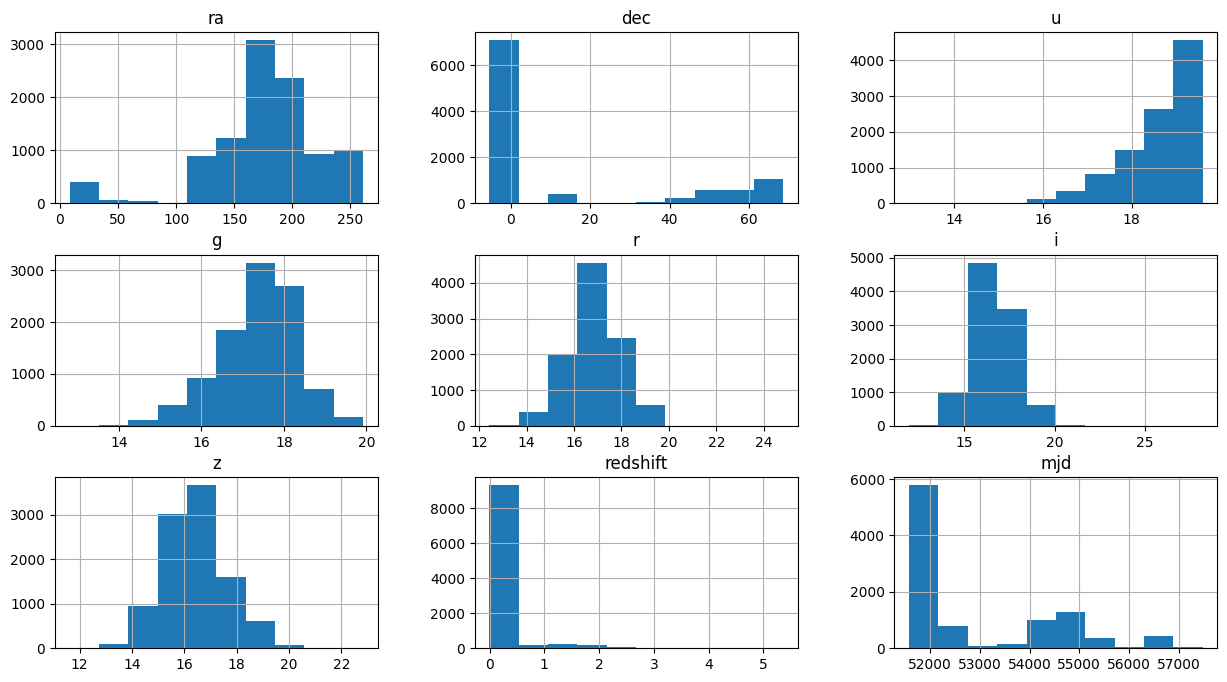

In [9]:
Data.hist(figsize=(15,8))

Признаки **ra, g, r, i, z** имеют распределение схожее с нормальным. **u** схожее с бета распределение. Исследуем признаки dec, redshift, mjd.

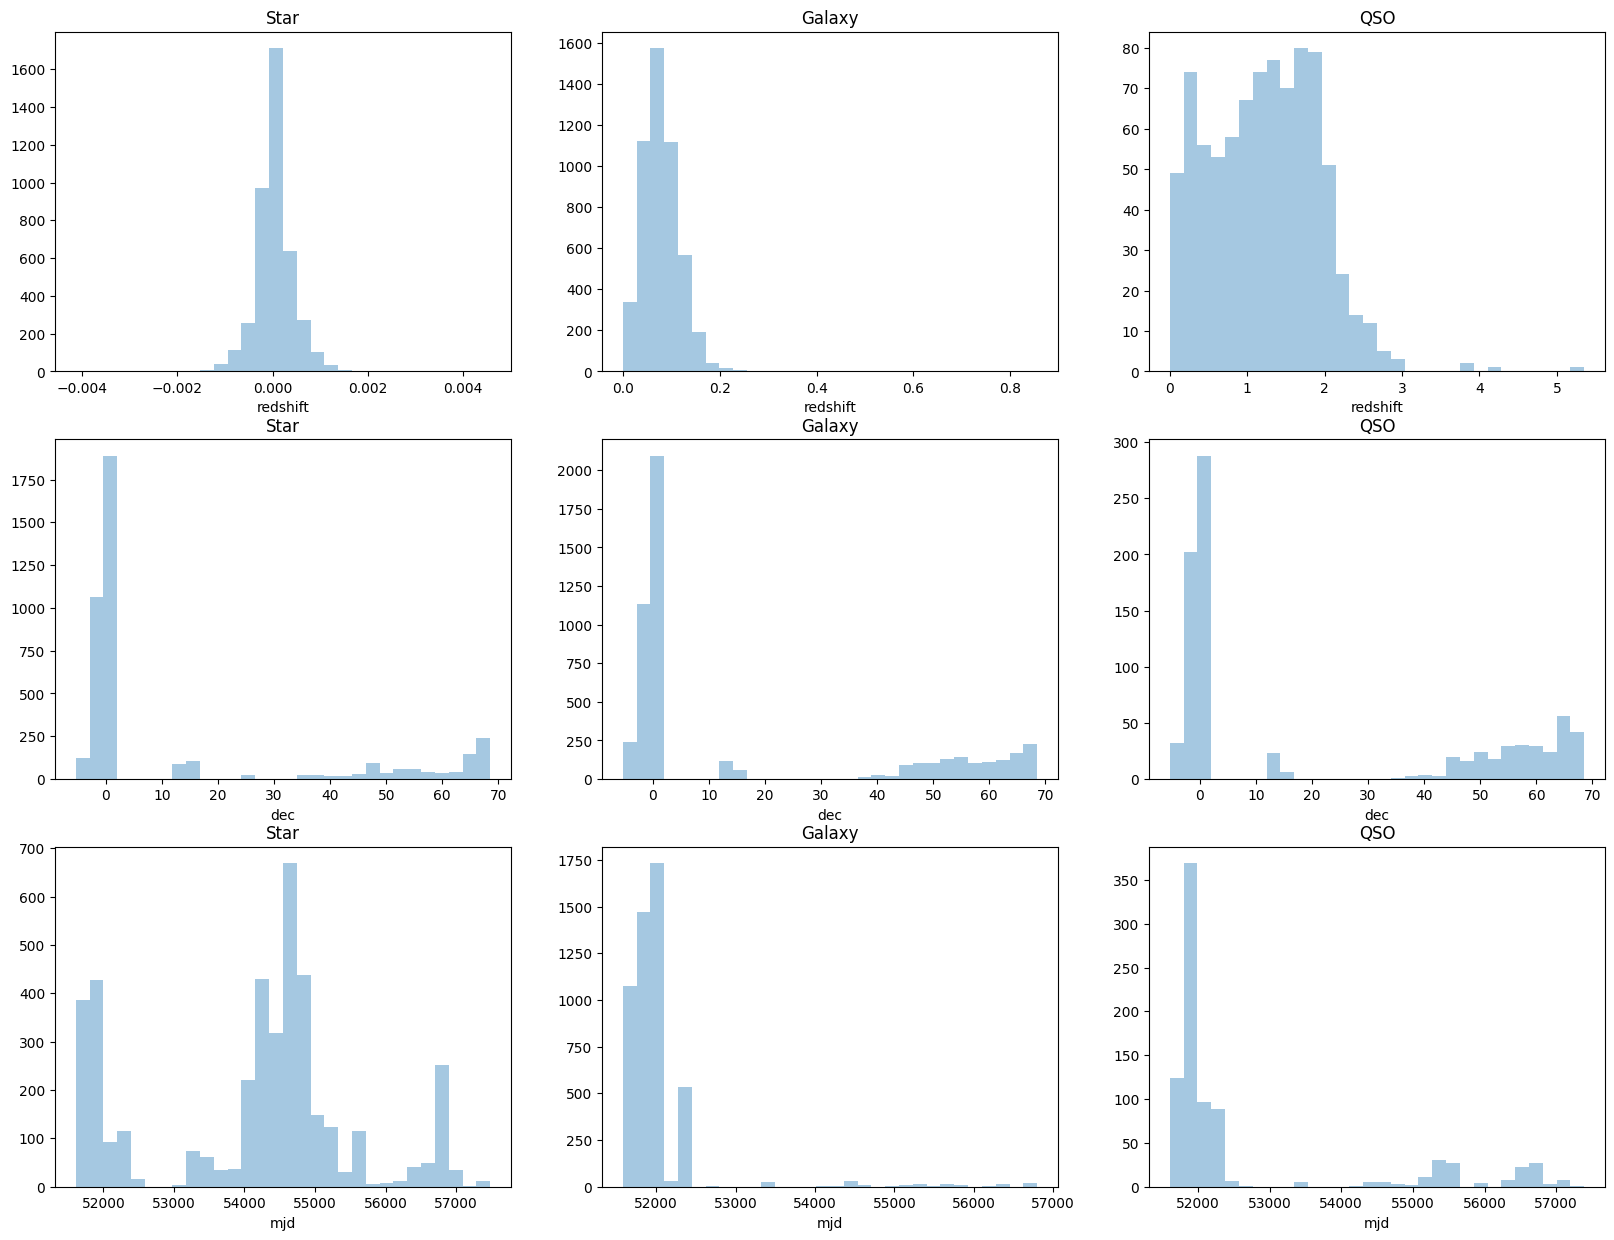

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(20, 15))
ax = sns.distplot(Data[Data['class']=='STAR'].redshift, bins = 30, ax = axes[0,0], kde = False)
ax.set_title('Star')
ax = sns.distplot(Data[Data['class']=='GALAXY'].redshift, bins = 30, ax = axes[0,1], kde = False)
ax.set_title('Galaxy')
ax = sns.distplot(Data[Data['class']=='QSO'].redshift, bins = 30, ax = axes[0,2], kde = False)
ax = ax.set_title('QSO')

ax = sns.distplot(Data[Data['class']=='STAR'].dec, bins = 30, ax = axes[1,0], kde = False)
ax.set_title('Star')
ax = sns.distplot(Data[Data['class']=='GALAXY'].dec, bins = 30, ax = axes[1,1], kde = False)
ax.set_title('Galaxy')
ax = sns.distplot(Data[Data['class']=='QSO'].dec, bins = 30, ax = axes[1,2], kde = False)
ax = ax.set_title('QSO')

ax = sns.distplot(Data[Data['class']=='STAR'].mjd, bins = 30, ax = axes[2,0], kde = False)
ax.set_title('Star')
ax = sns.distplot(Data[Data['class']=='GALAXY'].mjd, bins = 30, ax = axes[2,1], kde = False)
ax.set_title('Galaxy')
ax = sns.distplot(Data[Data['class']=='QSO'].mjd, bins = 30, ax = axes[2,2], kde = False)
ax = ax.set_title('QSO')


Диапазон значений признака redshift для класса QSO достаточно сильно отличается от двух других.

<AxesSubplot: >

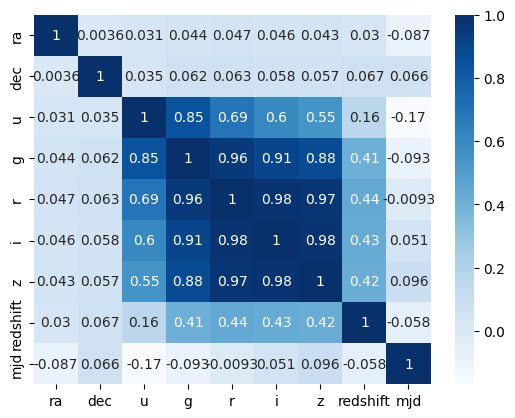

In [11]:
sns.heatmap(Data.corr(), annot=True, cmap=plt.cm.Blues)

Наиболее сильная корреляция наблюдается у характеристик, которые представляют собой отклик 5 полос телескопа, а именно *u, g, r, i, z*. Стоит отметить, что признаки ra и dec почти никак не влияют на другие. 

## Выбросы

In [12]:
cols = ['u', 'g', 'r', 'i', 'z'] # часть признаков взята для удобной визуализации, т.к они имеют схожий диапазон значений

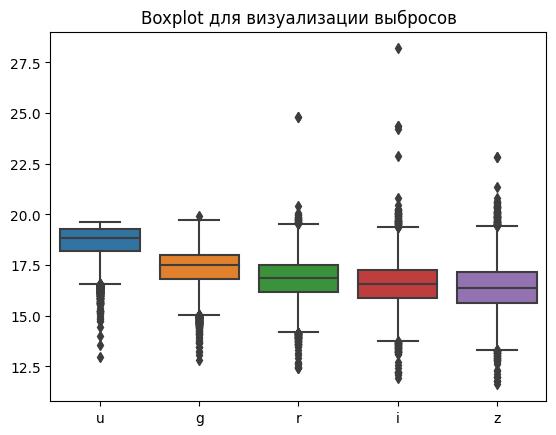

In [13]:
sns.boxplot(data=Data[cols])
plt.title('Boxplot для визуализации выбросов')
plt.show()

Т.к диапазон значений признака redshift для класса QSO сильно отличается от двух других, то для этой характеристики удаление выбросов с помощью квантилей не совсем подходит. 

In [14]:
cols = ['ra', 'dec', 'u', 'g', 'r', 'i', 'z',  'mjd'] 
Q1 = Data[cols].quantile(0.25)
Q3 = Data[cols].quantile(0.75)
IQR = Q3 - Q1
Data = Data[~((Data[cols] < (Q1 - 1.5 * IQR)) |(Data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

Количество записей и характеристик после удаления ненужных признаков и выбросов:

In [15]:
Data.shape

(9139, 10)

In [16]:
Data['class'].value_counts()

GALAXY    4713
STAR      3631
QSO        795
Name: class, dtype: int64

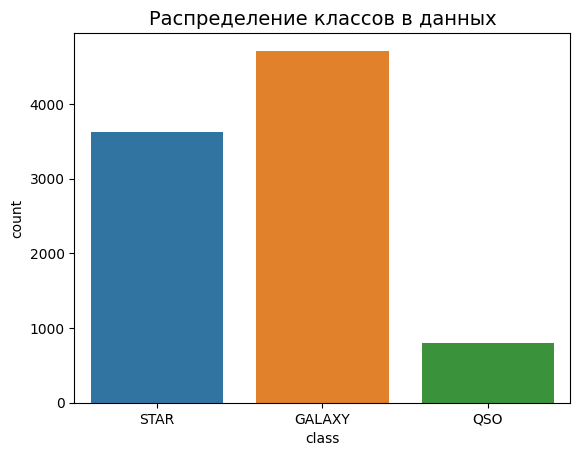

In [17]:
sns.countplot(x = Data['class'])
plt.title('Распределение классов в данных', fontsize =14)
plt.show()

Для избежания дисбаланса классов, случайно выберем по 780 наблюдений из двух других классов.

In [24]:
def undersample(data, class_name, l):
    res = data.loc[data['class']==class_name]
    res = res.sample(frac=1, random_state=42).reset_index(drop=True)
    return res[:l]
l = len(Data.loc[Data['class']=='QSO'])
stars = undersample(Data, 'STAR', l)
galaxies = undersample(Data, 'GALAXY', l)

In [28]:
df = pd.concat([stars, galaxies, Data.loc[Data['class']=='QSO']], ignore_index=True)

In [29]:
df['class']=df['class'].map({'STAR':0,'GALAXY':1,'QSO':2}).astype(int)

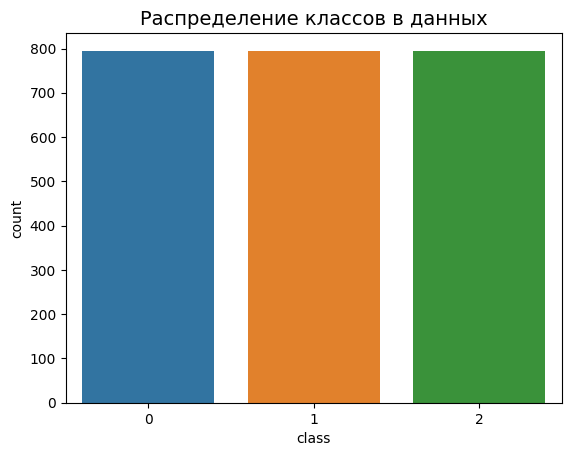

In [30]:
sns.countplot(x = df['class'])
plt.title('Распределение классов в данных', fontsize =14)
plt.show()

In [31]:
df.describe()

,ra,dec,u,g,r,i,z,class,redshift,mjd
count,2385.000000,2385.000000,2385.000000,2385.000000,2385.000000,2385.000000,2385.000000,2385.000000,2385.000000,2385.000000
mean,183.841984,16.092696,18.743651,17.759625,17.327834,17.106503,16.975102,1.000000,0.432046,52896.733333
std,34.518593,26.276544,0.698291,0.978653,1.156309,1.234823,1.303986,0.816668,0.684054,1539.471246
min,110.273031,-3.524988,16.558370,15.039810,14.242370,13.860890,13.547940,0.000000,-0.003328,51608.000000
25%,161.311483,-0.574504,18.340660,17.129370,16.497050,16.208460,16.006230,0.000000,0.000253,51900.000000
50%,183.264183,0.409508,18.943250,17.810650,17.317950,17.076470,16.940440,1.000000,0.075669,51993.000000
75%,205.211978,46.387378,19.296680,18.520120,18.314710,18.201250,18.125830,2.000000,0.652138,54208.000000
max,260.884382,68.540567,19.599750,19.738690,19.492490,19.330160,19.417630,2.000000,5.353854,57401.000000


Так как диапазон значений у некоторых характеристик сильно отличается от других, то не будет лишним провести масштабирование данных, что поможет избежать искажения результатов модели. 

In [35]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.drop('class', axis=1))
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df['class'], test_size=0.3)

[Выбор модели](http://neerc.ifmo.ru/wiki/index.php?title=%D0%A4%D0%B0%D0%B9%D0%BB:Scikit-learn-scheme.png). Для общей оценки модели будем использовать f1-score, так как эта метрика объединяет в себе информацию о точности и полноте алгоритма.

## LinearSVC

In [83]:
LSVC = LinearSVC()
LSVC.fit(X_train, y_train)
y_pred = LSVC.predict(X_test)
f1_LSVC = f1_score(y_test, y_pred, average='macro')
print("LinearSVC f1-score is: %3.2f" % (f1_LSVC))

LinearSVC f1-score is: 0.92


In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       236
           1       0.87      0.89      0.88       234
           2       0.98      0.97      0.98       246

    accuracy                           0.92       716
   macro avg       0.92      0.92      0.92       716
weighted avg       0.92      0.92      0.92       716



LinearSVC хорошо обнаруживает класс 2.

## KNN

In [85]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
f1_KNN = f1_score(y_test, y_pred, average='macro')
print("KNN f1-score is: %3.2f" % (f1_KNN))

KNN f1-score is: 0.87


In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       236
           1       0.81      0.91      0.86       234
           2       0.96      0.92      0.94       246

    accuracy                           0.87       716
   macro avg       0.88      0.87      0.87       716
weighted avg       0.88      0.87      0.87       716



В целом, результаты KNN не очень хорошие, хуже всего определяется класс 0: полнота 0.79 и доля верных классификаций 0.85.

## RandomForestClassifier

In [131]:
RFC = RandomForestClassifier(n_estimators=42, random_state=42)
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
f1_RFC = f1_score(y_test, y_pred, average='macro')
print("RandomForestClassifier f1-score is:",  f1_RFC)

RandomForestClassifier f1-score is: 0.9804587549614675


In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       236
           1       0.97      0.97      0.97       234
           2       0.98      0.97      0.98       246

    accuracy                           0.98       716
   macro avg       0.98      0.98      0.98       716
weighted avg       0.98      0.98      0.98       716



RandomForestClassifier сходу показывает отличные результаты, полностью покрывается класс 0 и точность при этом 0.99.

# Hyperparameter optimization

Попробуем улучшить результаты у RFC, т.к модель имеет наивысшие результаты.

In [146]:
parameters = {'n_estimators':[3,5, 10,12, 15,50,100, 200],
              'max_depth':[12,20,25, 40, 60,100,150, 300, 500],
              'criterion': ['gini', 'entropy', 'log_loss'],
              'n_jobs':[-1],
              'random_state':[42]}
RFC = RandomForestClassifier()
clf = GridSearchCV(RFC, parameters, n_jobs=-1, scoring='f1_macro', verbose=2, cv=10)
clf.fit(X_train, y_train)
par = clf.best_params_

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


In [147]:
clf.score(X_train, y_train)

0.99759709833388

In [148]:
par

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 10,
 'n_jobs': -1,
 'random_state': 42}

In [149]:
RFC = RandomForestClassifier(**par)
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
f1_RFC = f1_score(y_test, y_pred, average='macro')
print("RandomForestClassifier f1-score is:",  f1_RFC)
print(classification_report(y_test, y_pred))

RandomForestClassifier f1-score is: 0.9776919004234713
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       236
           1       0.96      0.97      0.97       234
           2       0.98      0.96      0.97       246

    accuracy                           0.98       716
   macro avg       0.98      0.98      0.98       716
weighted avg       0.98      0.98      0.98       716



# Вывод

В целом, с задачей справляются все представленные модели. К сожалению, подбор гиперпараметров не помог модели RandomForestClassifier, однако результат на "урезанном" наборе данных оказался довольно хорошим, что оправдывает "легкий" путь в решении дисбаланса классов.